# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) Project 4: Predicting Terrorism / Bayesian Inference (Mini)

Over the course of the last week, we've been investigating Bayesian methods to understand various populations. This project calls on you to apply Bayesian inference (and other tactics) to a fascinating dataset: the Global Terrorism Database.

## About the Dataset

From Kaggle:
> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2015 (with annual updates planned for the future). The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 150,000 cases. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the [University of Maryland](http://start.umd.edu/gtd/). 

> Geography: Worldwide

> Time period: 1970-2015, except 1993 (2016 in progress, publication expected June 2017)

> Unit of analysis: Attack

> Variables: >100 variables on location, tactics, perpetrators, targets, and outcomes

> Sources: Unclassified media articles (Note: Please interpret changes over time with caution. Global patterns are driven by diverse trends in particular regions, and data collection is influenced by fluctuations in access to media coverage over both time and place.)

> Definition of terrorism:

> "The threatened or actual use of illegal force and violence by a non-state actor to attain a political, economic, religious, or social goal through fear, coercion, or intimidation."

You will need to make use of the [codebook](http://start.umd.edu/gtd/downloads/Codebook.pdf) that functions as a data dictionary.

Moreover, this [2007 paper by LaFree (UMD)](https://ccjs.umd.edu/sites/ccjs.umd.edu/files/pubs/FTPV_A_224594.pdf) introduces the dataset very well.

You must download the 28MB zip file, unzip it, and work with the 128MB csv on your machine.


## Goal

While there are fewer requirements of this project, the open-ended nature of the ask should force you to think about your approach and research methods. When assessing your performance on this project, we are equally interested in the method and questions you are asking as much as the implementation of those methods.

In the process of maintaining the GTD, you'll note that the year 1993 has zero recorded instances. Due to the many actors maintaining the dataset, this year has been lost.

Your goal is to impute the number of bombing/exposions that occured in 1993. (You'll note that **even we** do not have the answer. That increases our focus on your methods.)

The structure of your project must include four components: exploratory data analysis, Bayesian inference to examine the the difference in incidences across the globe, a model to impute the missing values, and a brief description of your methods. 


### Part One: EDA

You should gain an understanding of the attacks (focus on `attacktype1`), their distribution across the world, and their frequency.

You will discover different things than your classmates on this portion. Your presentation should include compelling visualizations describing terror incidents around the world.

You are **required** to produce at least one visualization that is indexed by time. For example, the number of bombings that occurred by year over time.


### Part Two: Bayesian Inference

Terror attacks are a ripe area of research for Bayesian inference. Given their infrequency, it is (thankfully) difficult for us to assume a high number of samples that approach some normal distribution.

Because of this, we should construct a prior about the amount of terror a given area has seen and update that prior with new information (like a new year of attacks or a contrasting country from within the same region). 

You should compare two populations of your choosing using Bayesian inference. We want to know if the amount of terror one area has seen differs in a significant way than another area (or time period!)

For example, if you are interested in knowing if one country in South America differs in a significant way from another area, you may make your prior  assume that some country is a country in South America with μ average attacks and σ variation across South American countries. You would then update that prior with the information of a single country in South America as well as a separate country in South America. How significantly do the resulting posteriors differ? (An important assumption made here is that the time periods are being held constant, perhaps a single year.)

You should structure your own test of populations rather than using the above example. If you're unable to setup a different test, brainstorm with your squad in the Slack chat.

You must justify the prior you selected and interpret your results (use credible intervals.) Remember you can attempt to use different priors (but don't "prior hack" to affect your output!)


### Part Three: 1993

The year 1993 is missing from our dataset! Given there is a wealth of information across different types of attacks, we will focus analysis on `attacktype1` bombings (category 3, as per the codebook)

For this section, you should determine a methodology that allows you to best fill in the missing values. Perhaps you want to consider hemispheres to be separate models, for example. (That's the only hint you'll receive - and even that hint is not an optimal option.)

Once you've created your methodology and imputed the number of bombings in 1993, you should feel free to apply your methodology to **OTHER** attack categories. (Bonus opportunity: turn your method into a pipeline. Use that pipeline to fill in other missing attack values.)


### Part Four: Methods

Please draft a max two page (or four pages double spaced) report discussing your methodology and findings. Visualizations may be included in an appendix.

Your write-up should have two parts: the Bayesian test you constructed and the values you imputed for 1993 attacks.

In your Bayesian inference section, be sure to defend your prior. Comment on your results of the differing populations.

In your missing value imputation modelling portion, justify the model or tactic you used. Bear in mind simply averaging by hemisphere can, theoretically, be a solution. Err on the side of simple and elegant rather than complex to be complex.


## Other

If you're enjoying this research (and want to go further), get in touch with Joseph. Your results can be shared with UMD START and academics. ([Gary LaFree](http://www.start.umd.edu/people/gary-lafree) or [Erin Miller](http://www.start.umd.edu/people/erin-miller))

Moreover, if you want to dig into the literature, check out [Dr. Schrodt's](http://parusanalytics.com/about.html) Bayesian approach to understanding terror.

Thank you to [Dr. Joseph Young](http://fs2.american.edu/jyoung/www/) for his thoughts on this research.



In [28]:
import pandas as pd
data = pd.read_excel('/Users/rowan/Desktop/GTD_0616dist/globalterrorismdb_0616dist.xlsx')

In [29]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,ingroup,ingroup2,ingroup3,gsubname3,motive,guncertain1,guncertain2,guncertain3,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,0,0,NaN,0,NaT,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1,0,NaN,NaN,1,1,1,0.0,NaN,.,0,1,0,1,Assassination,NaN,.,NaN,.,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,.,NaN,.,NaN,NaN,NaN,.,NaN,.,NaN,.,NaN,NaN,NaN,.,MANO-D,NaN,NaN,NaN,NaN,3629,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,.,NaN,NaN,.,NaN,NaN,.,NaN,13,Unknown,NaN,.,NaN,.,NaN,.,NaN,.,NaN,.,NaN,.,NaN,.,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,.,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,.,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaT,130,Mexico,1,North America,NaN,Mexico city,19.432608,-99.133207,1,0,NaN,NaN,1,1,1,0.0,NaN,.,0,1,0,6,Hostage Taking (Kidnapping),NaN,.,NaN,.,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,.,NaN,.,NaN,NaN,NaN,.,NaN,.,NaN,.,NaN,NaN,NaN,.,23rd of September Communist League,NaN,NaN,NaN,NaN,3330,NaN,NaN,NaN,NaN,0.0,NaN,NaN,7.0,NaN,NaN,NaN,.,NaN,NaN,.,NaN,NaN,.,NaN,13,Unknown,NaN,.,NaN,.,NaN,.,NaN,.,NaN,.,NaN,.,NaN,.,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,.,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,.,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaT,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4,0,NaN,NaN,1,1,1,0.0,NaN,.,0,1,0,1,Assassination,NaN,.,NaN,.,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,.,NaN,.,NaN,NaN,NaN,.,NaN,.,NaN,.,NaN,NaN,NaN,.,Unknown,NaN,NaN,NaN,NaN,-9,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,.,NaN,NaN,.,NaN,NaN,.,NaN,13,Unknown,NaN,.,NaN,.,NaN,.,NaN,.,NaN,.,NaN,.,NaN,.,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,.,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,.,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaT,78,Greece,8,Western Europe,Attica,Athens,37.983773,23.728157,1,0,NaN,NaN,1,1,1,0.0,NaN,.,0,1,0,3,Bombing/Explosion,NaN,.,NaN,.,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,.,NaN,.,NaN,NaN,NaN,.,NaN,.,NaN,.,NaN,NaN,NaN,.,Unknown,NaN,NaN,NaN,NaN,-9,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,.,NaN,NaN,.,NaN,NaN,.,NaN,6,Explosives/Bombs/Dynamite,16.0,Unknown Explosive Type,NaN,.,NaN,.,NaN,.,NaN,.,NaN,.,NaN,.,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,.,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,.,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,19

In [30]:
#printing the names of the different terror groups
for item in data.gname.unique():
    print item

MANO-D
23rd of September Communist League
Unknown
Black Nationalists
Tupamaros (Uruguay)
New Year's Gang
Weather Underground, Weathermen
Left-Wing Militants
Armed Commandos of Liberation
Commune 1
Eritrean Liberation Front
Strikers
Student Radicals
White Extremists
Armed Forces of National Liberation- Venezuela (FALN)
New People's Army (NPA)
Armed Revolutionary Independence Movement (MIRA)
Popular Front for the Liberation of Palestine (PFLP)
Popular Front for the Liberation of Palestine, Gen Cmd (PFLP-GC)
1st of May Group
Rebel Armed Forces of Guatemala (FAR)
Ku Klux Klan
Popular Revolutionary Vanguard (VPR)
Revolutionary Force 9
Puerto Rican Nationalists
Chicano Liberation Front
Puerto Rican Resistance Movement
Black Panthers
Dominican Popular Movement (MPD)
Argentine Liberation Front (FAL)
Argentine National Organization Movement (MANO)
Japanese Red Army (JRA)
Saor Eire (Irish Republican Group)
New World Liberation Front (NWLF)
Cuban Exiles
The World United Formosans for Independence

former "comrades-in-arms"
antiapartheid guerrillas
Simon Bolivar Guerrilla Coordinating Board (CGSB)
Revolutionary Eelam Organization (EROS)
Kisar Liberation Movement
Committee of Solidarity with Arab and Middle East Political Prisoners (CSPPA)
Moslem opponents of Gemayel
Marxist Peoples Fedayeen of Iran
America Battalion
Red Brigades Fighting Communist Union (BR-UCC)
Black Flag (Bandera Negra)
Union of Galilee Christians
Up the IRS, Inc
Palestinian Forces
New Ugandan Army
The Order II (Bruder Schweigen Strike Force II)
Eelam People's Revolutionary Liberation Front (EPRLF)
Vietnamese Refugees
People's Command
National Revolutionary Command (Umar al-Mukhtar)
Islamic Liberation Organization
Arab Revolutionary Cells
Anti-American Arab Liberation Front
Tribal Separatists
Kisan Indian Organization
Patria y Libertad (Fatherland and Liberty)
Armed Communist Front
Arab Commando Cells
Commando Internacionalista Simon Bolivar
Arab Revolutionary Front
Anti-Imperialist International Brigades
Bangl

In [102]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,ingroup,ingroup2,ingroup3,gsubname3,motive,guncertain1,guncertain2,guncertain3,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,0,0,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1,0,NaN,NaN,1,1,1,0.0,NaN,.,0,1,0,1,Assassination,NaN,.,NaN,.,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,.,NaN,.,NaN,NaN,NaN,.,NaN,.,NaN,.,NaN,NaN,NaN,.,MANO-D,NaN,NaN,NaN,NaN,3629,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,.,NaN,NaN,.,NaN,NaN,.,NaN,13,Unknown,NaN,.,NaN,.,NaN,.,NaN,.,NaN,.,NaN,.,NaN,.,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,.,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,.,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,NaN,Mexico city,19.432608,-99.133207,1,0,NaN,NaN,1,1,1,0.0,NaN,.,0,1,0,6,Hostage Taking (Kidnapping),NaN,.,NaN,.,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,.,NaN,.,NaN,NaN,NaN,.,NaN,.,NaN,.,NaN,NaN,NaN,.,23rd of September Communist League,NaN,NaN,NaN,NaN,3330,NaN,NaN,NaN,NaN,0.0,NaN,NaN,7.0,NaN,NaN,NaN,.,NaN,NaN,.,NaN,NaN,.,NaN,13,Unknown,NaN,.,NaN,.,NaN,.,NaN,.,NaN,.,NaN,.,NaN,.,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,.,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,.,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4,0,NaN,NaN,1,1,1,0.0,NaN,.,0,1,0,1,Assassination,NaN,.,NaN,.,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,.,NaN,.,NaN,NaN,NaN,.,NaN,.,NaN,.,NaN,NaN,NaN,.,Unknown,NaN,NaN,NaN,NaN,-9,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,.,NaN,NaN,.,NaN,NaN,.,NaN,13,Unknown,NaN,.,NaN,.,NaN,.,NaN,.,NaN,.,NaN,.,NaN,.,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,.,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,.,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.983773,23.728157,1,0,NaN,NaN,1,1,1,0.0,NaN,.,0,1,0,3,Bombing/Explosion,NaN,.,NaN,.,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,.,NaN,.,NaN,NaN,NaN,.,NaN,.,NaN,.,NaN,NaN,NaN,.,Unknown,NaN,NaN,NaN,NaN,-9,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,.,NaN,NaN,.,NaN,NaN,.,NaN,6,Explosives/Bombs/Dynamite,16.0,Unknown Explosive Type,NaN,.,NaN,.,NaN,.,NaN,.,NaN,.,NaN,.,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,.,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,.,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,19

In [103]:
def eda(dataframe): #Ritkas code chunk to check quality of data
    print "missing values \n", dataframe.isnull().sum() #shows total amount of null values for each column
    print "dataframe types \n", dataframe.dtypes
    print "dataframe shape \n", dataframe.shape     
    print "dataframe describe \n", dataframe.describe()
    print "dataframe length =", len(dataframe) #length of the dataframe
    print "duplicates", dataframe.duplicated().sum() # added this to duplicates in the data
    for item in dataframe:
        print item
        print dataframe[item].nunique()
        
eda(data)

missing values 
eventid                    0
iyear                      0
imonth                     0
iday                       0
approxdate            152016
extended                   0
resolution            153270
country                    0
country_txt                0
region                     0
region_txt                 0
provstate              14520
city                     446
latitude                4519
longitude               4519
specificity                0
vicinity                   0
location              114561
summary                66140
crit1                      0
crit2                      0
crit3                      0
doubtterr                  1
alternative           132536
alternative_txt            0
multiple                   0
success                    0
suicide                    0
attacktype1                0
attacktype1_txt            0
attacktype2           151806
attacktype2_txt            0
attacktype3           156460
attacktype3_txt            

In [104]:
data = data[data.success==1]
data = data[data.iday !=0]

In [105]:
from datetime import datetime
data['Date'] = data.apply(lambda x: datetime(x['iyear'], x['imonth'], x['iday']), axis=1)

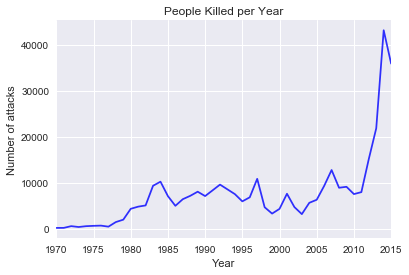

In [106]:
import matplotlib.pyplot as plt
data.groupby('iyear').nkill.sum().plot(kind="line", color='b', alpha=0.8)
plt.xlabel('Year')
plt.ylabel('Number of attacks')
plt.title('People Killed per Year')

Possibly filter the df to only include where 'doubterr' is 0 since those are the ones that are without a doubt terrorism. 
'Alternative' and 'alternative_txt' are only applicable where doubterr is 1, so if you get rid of then don't need to inpute null values.
'Propextent' is the extent of property damage which could be really cool to look at
Combine 'ishostkid' and 'ishostkidus'


In [107]:
data_1993 = data[['Date', 'region_txt','latitude', 'longitude',
                  'attacktype1_txt', 'nwound', 'targtype1_txt', 'nkill', 'gname']]

In [108]:
data_1993.head()

,Date,region_txt,latitude,longitude,attacktype1_txt,nwound,targtype1_txt,nkill,gname
5,1970-01-01,North America,37.005105,-89.176269,Armed Assault,0.0,Police,0.0,Black Nationalists
7,1970-01-02,North America,37.805065,-122.273024,Bombing/Explosion,0.0,Utilities,0.0,Unknown
8,1970-01-02,North America,43.076592,-89.412488,Facility/Infrastructure Attack,0.0,Military,0.0,New Year's Gang
9,1970-01-03,North America,43.072950,-89.386694,Facility/Infrastructure Attack,0.0,Government (General),0.0,New Year's Gang
11,1970-01-06,North America,39.740010,-104.992259,Facility/Infrastructure Attack,0.0,Military,0.0,Left-Wing Militants


In [109]:
data_1993 = data_1993[data_1993.attacktype1_txt == 'Bombing/Explosion']

In [110]:
data_1993.index = data_1993.Date

In [111]:
data_1993['year'] = data_1993.index.year

In [112]:
abc = pd.get_dummies(data_1993.attacktype1_txt)
merge = pd.concat([data_1993, abc], axis=1)

In [113]:
merge = merge[['Date', 'Bombing/Explosion', 'year', 'region_txt']]

In [127]:
df = merge.groupby(['year']).sum()
df

,Bombing/Explosion
year,
1970,265.0
1971,206.0
1972,154.0
1973,125.0
1974,260.0
1975,335.0
1976,379.0
1977,556.0
1978,592.0


In [115]:
print "1993 Bombings", (1832+1532+1004+701)/4.0

1993 Bombings 1267.25


In [129]:
data[data.gname == 'Continuity Irish Republican Army (CIRA)']

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,ingroup,ingroup2,ingroup3,gsubname3,motive,guncertain1,guncertain2,guncertain3,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related,Date
62746,199607140002,1996,7,14,NaN,0,NaN,603,United Kingdom,8,Western Europe,Northern Ireland,Enniskillen,54.346531,-7.640404,1,0,NaN,NaN,1,1,1,0.0,NaN,.,0,1,0,3,Bombing/Explosion,NaN,.,NaN,.,1,Business,8.0,Hotel/Resort,NaN,Hotel,216.0,Great Britain,NaN,.,NaN,.,NaN,NaN,NaN,.,NaN,.,NaN,.,NaN,NaN,NaN,.,Continuity Irish Republican Army (CIRA),NaN,NaN,NaN,NaN,769,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,.,NaN,NaN,.,NaN,NaN,.,NaN,6,Explosives/Bombs/Dynamite,15.0,Vehicle,NaN,.,NaN,.,NaN,.,NaN,.,NaN,.,NaN,.,Explosive,0.0,NaN,NaN,17.0,NaN,NaN,1,NaN,.,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,.,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,1,1,NaN,1996-07-14
66556,199709160002,1997,9,16,NaN,0,NaN,603,United Kingdom,8,Western Europe,Northern Ireland,Markethill,54.298121,-6.521291,1,0,NaN,NaN,1,1,1,0.0,NaN,.,0,1,0,3,Bombing/Explosion,NaN,.,NaN,.,3,Police,22.0,"Police Building (headquarters, station, school)",govt,police station,216.0,Great Britain,NaN,.,NaN,.,NaN,NaN,NaN,.,NaN,.,NaN,.,NaN,NaN,NaN,.,Continuity Irish Republican Army (CIRA),CAC,NaN,NaN,NaN,769,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,.,NaN,NaN,.,NaN,NaN,.,NaN,6,Explosives/Bombs/Dynamite,15.0,Vehicle,NaN,.,NaN,.,NaN,.,NaN,.,NaN,.,NaN,.,Car bomb,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,.,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,.,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,1,1,NaN,1997-09-16
67502,199801250006,1998,1,25,NaN,0,NaN,603,United Kingdom,8,Western Europe,Northern Ireland,Enniskillen,54.346531,-7.640404,1,0,Fermanagh (County),01/25/1998: The Continuity IRA was believed re...,1,1,1,0.0,NaN,.,0,1,0,3,Bombing/Explosion,NaN,.,NaN,.,1,Business,11.0,Entertainment/Cultural/Stadium/Casino,NaN,Civilians at a leisure center in Enniskillen,233.0,Northern Ireland,NaN,.,NaN,.,NaN,NaN,NaN,.,NaN,.,NaN,.,NaN,NaN,NaN,.,Continuity Irish Republican Army (CIRA),NaN,NaN,NaN,NaN,769,NaN,NaN,NaN,Unknown,0.0,NaN,NaN,NaN,0.0,0.0,NaN,.,NaN,NaN,.,NaN,NaN,.,NaN,6,Explosives/Bombs/Dynamite,15.0,Vehicle,NaN,.,NaN,.,NaN,.,NaN,.,NaN,.,NaN,.,Time fuse,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,.,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,.,NaN,NaN,"“Car Bomb Left at Club Door,” Belfast News Let...","“Continuity IRA blamed for bombing/SDLP, SF an...",NaN,CETIS,0,0,1,1,NaN,1998-01-25
67611,199803030001,1998,3,3,NaN,0,NaN,603,United Kingdom,8,Western Europe,Northern Ireland,Poyntzpass,54.292584,-6.370958,1,0,Ulster (Province),03/03/1998: Unidentified assailants shot and k...,1,1,1,0.0,NaN,.,0,1,0,2,Armed Assault,NaN,.,NaN,.,14,Private Citizens & Property,68.0,Named Civilian,Civilians,"D

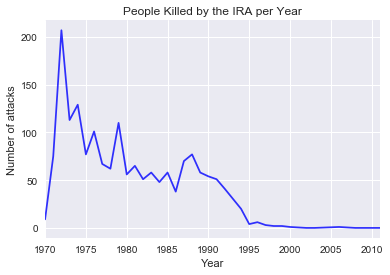

In [126]:
df_ira.groupby('iyear').nkill.sum().plot(kind="line", color='b', alpha=0.8)
plt.xlabel('Year')
plt.ylabel('Number of attacks')
plt.title('People Killed by the IRA per Year')

In [116]:
#making df for my populations of interest
cira = data[data.gname == 'Continuity Irish Republican Army (CIRA)'].iyear.value_counts().values
rira = data[data.gname == 'Real Irish Republican Army (RIRA)'].iyear.value_counts().values

In [117]:
df_ira = data[data.gname == 'Irish Republican Army (IRA)'] 
df_prior = df_ira[df_ira.iyear < 1995] #setting a df for the prior

In [118]:
import pymc3 as pm
import pydot
import numpy as np
import seaborn as sns
%matplotlib inline

In [119]:
mean_prior_mean = df_prior.iyear.value_counts().mean()
mean_prior_std = df_prior.iyear.value_counts().std()

print mean_prior_mean
print mean_prior_std

92.6666666667
40.781140853


In [120]:
#make a model!!
with pm.Model() as model:

    cira_mean = pm.Normal('attacks_cira_mean', mean_prior_mean, sd=mean_prior_std)
    rira_mean = pm.Normal('attacks_rira_mean', mean_prior_mean, sd=mean_prior_std)

In [121]:
#setting a uniform dist for my standard deviation
std_prior_lower = 0.01
std_prior_upper = 100.0

with model:
    
    cira_std = pm.Uniform('attacks_cira_std', lower=std_prior_lower, upper=std_prior_upper)
    rira_std = pm.Uniform('attacks_rira_std', lower=std_prior_lower, upper=std_prior_upper)

In [122]:
with model:

    grp_cira = pm.Normal('group_cira', mu=cira_mean, sd=cira_std, observed= cira)
    grp_rira = pm.Normal('group_rira', mu=rira_mean, sd=rira_std, observed= rira)

In [123]:
with model:

    diff_of_means = pm.Deterministic('mean_dif', rira_mean - cira_mean)
    diff_of_stds = pm.Deterministic('std_diff', rira_std - cira_std)
    effect_size = pm.Deterministic('effect size',
                                   diff_of_means / np.sqrt((rira_std**2 + cira_std**2) / 2))

In [79]:
with model:
    trace = pm.sample(20000, njobs=4)

Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average ELBO = -145.79: 100%|██████████| 200000/200000 [00:18<00:00, 10751.93it/s]
Finished [100%]: Average ELBO = -144.2
100%|██████████| 20000/20000 [04:45<00:00, 70.05it/s] 


array([<matplotlib.axes._subplots.AxesSubplot object at 0x13620add0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1377b8e50>], dtype=object)

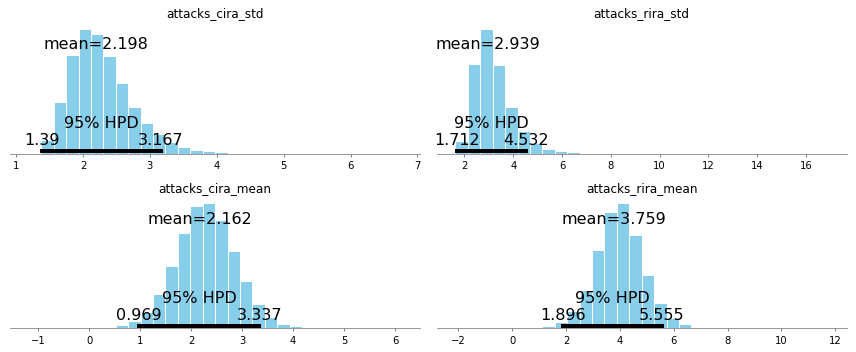

In [82]:
pm.plot_posterior(trace[3000:],
                  varnames=['attacks_cira_mean', 'attacks_rira_mean', 'attacks_cira_std', 'attacks_rira_std'],
                  color='#87ceeb')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x135af7a10>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x137996990>], dtype=object)

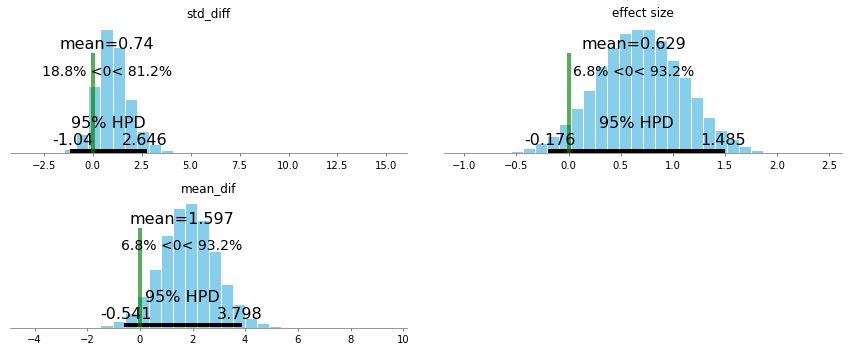

In [85]:
pm.plot_posterior(trace[3000:],
                  varnames=['mean_dif', 'std_diff', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')

In [86]:
pm.summary(trace[3000:],
           varnames=['mean_dif', 'std_diff', 'effect size'])


mean_dif:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  1.597            1.099            0.004            [-0.541, 3.798]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  -0.567         0.891          1.589          2.294          3.778


std_diff:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.740            0.930            0.007            [-1.040, 2.646]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  -0.893         0.156          0.660          1.233          2.834


effect size:

  Mean             SD               MC Error         95% HPD interval
  -----------

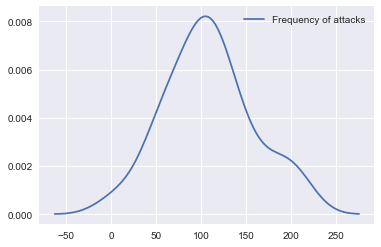

In [88]:
sns.kdeplot(df_prior.iyear.value_counts(), label='Frequency of attacks')

https://docs.google.com/document/d/1GSuhpfs-y3VT5v-P_tGRMq31APS7zjMdpdAECqCgb4k/edit?usp=sharing